### <center>I MADE ARYA KRISNANDY</center>
#### <center>F1D022048</center>

# import libary


In [176]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import math

kode di atas merupakan bagian dari pengimporan library yang digunakan pada program ini. Library NumPy digunakan untuk melakukan operasi matematika pada array, library Matplotlib digunakan untuk menampilkan gambar, dan library OpenCV digunakan untuk melakukan operasi pengolahan citra seperti convert color dan lain lain.

In [177]:
image = img.imread("../assets/manchester_united.jpeg")
img = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
img = np.pad(img,1)
height, width = img.shape
hasil = np.zeros((height, width), dtype=np.uint8)

## Melakukan perbaikan kualitas citra dari gambar yang tersedia dengan menggunakan :

## A. Mean

In [178]:
def mean(img,kernel):
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            temp = img[i - kernel.shape[0]//2:i + kernel.shape[0]//2 + 1, j - kernel.shape[0]//2:j + kernel.shape[0]//2 + 1]
            
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += kernel[k, l] * temp[k, l]
            hasil[i, j] = sum
    return hasil

## B. Median

In [179]:
def median(img, kernel):
    height, width = img.shape
    hasil = np.zeros((height, width), dtype=np.uint8)

    k_height, k_width = kernel.shape
    k_radius = k_height // 2

    for i in range(k_radius, height - k_radius):
        for j in range(k_radius, width - k_radius):
            temp = []
            for k in range(-k_radius, k_radius + 1):
                for l in range(-k_radius, k_radius + 1):
                    temp.append(img[i + k, j + l])

            temp.sort()
            mid = len(temp) // 2
            median = temp[mid] if len(temp) % 2 != 0 else (temp[mid - 1] + temp[mid]) // 2
            hasil[i, j] = median

    return hasil


## C. Modus

In [180]:
def modus(img,kernel):
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            temp = []
            for k in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                for l in range(-kernel.shape[1]//2, kernel.shape[1]//2+1):
                    temp+=[img[i+k][j+l]]
                    
            counts = np.zeros(256)
            for val in temp:
                counts[val] += 1
            max_count = -1
            max_val = -1
            
            for val in range(256):
                count = counts[val]
                if count > max_count:
                    max_count = count
                    max_val = val
            hasil[i][j] = max_val

    return hasil

## Kernel 3x3 berisi 1/9 dengan metode Mean, Median dan Modus

In [181]:
kernel3 = np.ones((3, 3), np.float32) / 9

## Hasil

## Kernel 9x9 dengan berisi 1/81 dengan metode yang sama seperti poin sebelumnya

In [182]:
kernel9 = np.ones((9, 9), np.float32) / 81

# MELAKUKAN SMOOTHING DAN SHARPENING CITRA 

In [183]:
def getPad(image, kernel):
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2

    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j
    result = np.pad(image,((atas, bawah), (kiri,kanan)), 'edge')

    return result

def konvolusi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    pad = getPad(image, kernel)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum+= pad[i+k][j+l] * kernel[k,l]

            result[i,j] = sum

    return result



In [184]:
smooth = np.array([
    [1/10,1/10,1/10],
    [1/10,1/5,1/10],
    [1/10,1/10,1/10],
])

sharp = np.array([
    [1/9,1/9,1/9],
    [1/9,8/9,1/9],
    [1/9,1/9,1/9],
])

smooth_MU = konvolusi(img, smooth)
sharp_MU = konvolusi(img, sharp)

Text(0.5, 1.0, 'Median 9x9')

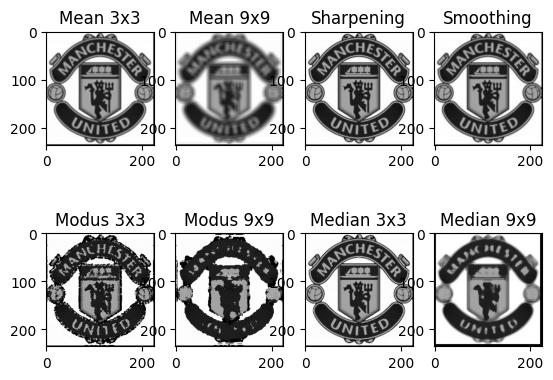

In [185]:
plt.subplot(2,4,1)
plt.imshow(mean(img,kernel3),cmap='gray')
plt.title("Mean 3x3")
plt.subplot(2,4,2)
plt.imshow(mean(img,kernel9),cmap='gray')
plt.title("Mean 9x9")
plt.subplot(2,4,3)
plt.imshow(sharp_MU, cmap='gray')
plt.title("Sharpening")
plt.subplot(2,4,4)
plt.imshow(smooth_MU, cmap='gray')
plt.title("Smoothing")
plt.subplot(2,4,5)
plt.imshow(modus(img,kernel3),cmap='gray')
plt.title("Modus 3x3")
plt.subplot(2,4,6)
plt.imshow(modus(img,kernel9),cmap='gray')
plt.title("Modus 9x9")
plt.subplot(2,4,7)
plt.imshow(median(img,kernel3),cmap='gray')
plt.title("Median 3x3")
plt.subplot(2,4,8)
plt.imshow(median(img,kernel9),cmap='gray')
plt.title("Median 9x9")

## Melakukan deteksi tepi untuk semua jenis perbaikan tadi dengan operator Sobel, Prewitt dan Robert pada gambar ./assets/manchester_united.jpeg

In [186]:
sobelX = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

sobelY = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

In [187]:
prewittX = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

prewittY = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

In [188]:
robertX = np.array([
    [1,0],
    [0,-1]
])

robertY = np.array([
    [0,1],
    [-1,0]
])

In [189]:
def findEdge(image, kernelx, kernely):
    result = np.zeros(image.shape).astype(int)
    pad = getPad(image, kernelx)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x = 0
            y = 0
            for k in range(kernelx.shape[0]):
                for l in range(kernelx.shape[1]):
                    x += pad[i+k][j+l] * kernelx[k,l]
                    y += pad[i+k][j+l] * kernely[k,l]

            result[i,j] = math.sqrt(x*x + y*y)

    return result

In [190]:
mean3 = mean(img,kernel3)
mean9 = mean(img,kernel9)
median3 = median(img,kernel3)
median9 = median(img,kernel9)
modus3 = modus(img,kernel3)
modus9 = modus(img,kernel9)

## Operator Prewitt

<function matplotlib.pyplot.show(close=None, block=None)>

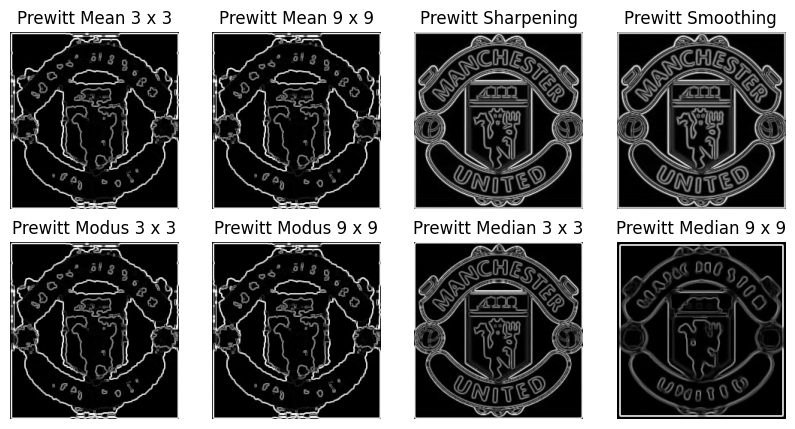

In [191]:
prewitt_mean3 = findEdge(mean3,prewittX,prewittY)
prewitt_median3 = findEdge(median3,prewittX,prewittY)
prewitt_modus3 = findEdge(modus3,prewittX,prewittY)
prewitt_mean9 = findEdge(mean9,prewittX,prewittY)
prewitt_median9 = findEdge(median9,prewittX,prewittY)
prewitt_modus9 = findEdge(modus9,prewittX,prewittY)
prewitt_smooth = findEdge(smooth_MU,prewittX,prewittY)
prewitt_sharp = findEdge(sharp_MU,prewittX,prewittY)

plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
plt.axis('off')
plt.imshow(prewitt_mean3, cmap='gray')
plt.title("Prewitt Mean 3 x 3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(prewitt_mean9, cmap='gray')
plt.title("Prewitt Mean 9 x 9")
plt.axis('off')
plt.subplot(2,4,3)
plt.imshow(prewitt_sharp, cmap='gray')
plt.title("Prewitt Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(prewitt_smooth, cmap='gray')
plt.title("Prewitt Smoothing")
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(prewitt_modus3, cmap='gray')
plt.title("Prewitt Modus 3 x 3")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(prewitt_modus9, cmap='gray')
plt.title("Prewitt Modus 9 x 9")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(prewitt_median3, cmap='gray')
plt.title("Prewitt Median 3 x 3")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(prewitt_median9, cmap='gray')
plt.title("Prewitt Median 9 x 9")
plt.axis('off')
plt.show

## Operator Sobel

<function matplotlib.pyplot.show(close=None, block=None)>

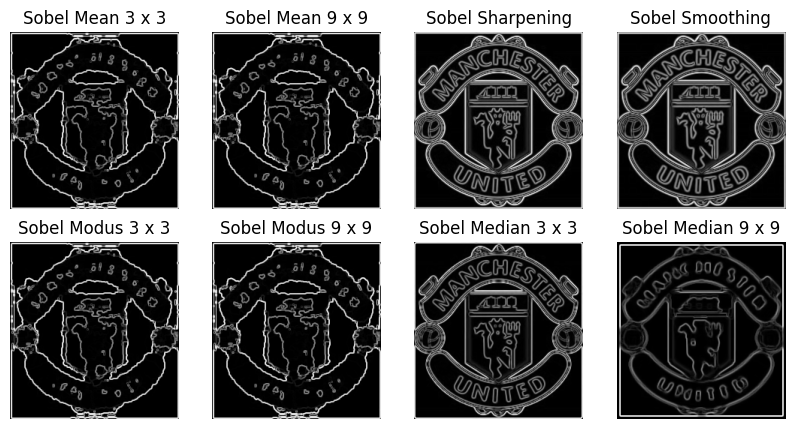

In [192]:
sobel_mean3 = findEdge(mean3,sobelX,sobelY)
sobel_median3 = findEdge(median3,sobelX,sobelY)
sobel_modus3 = findEdge(modus3,sobelX,sobelY)
sobel_mean9 = findEdge(mean9,sobelX,sobelY)
sobel_median9 = findEdge(median9,sobelX,sobelY)
sobel_modus9 = findEdge(modus9,sobelX,sobelY)
sobel_smooth = findEdge(smooth_MU,sobelX,sobelY)
sobel_sharp = findEdge(sharp_MU,sobelX,sobelY)

plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
plt.axis('off')
plt.imshow(sobel_mean3, cmap='gray')
plt.title("Sobel Mean 3 x 3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(sobel_mean9, cmap='gray')
plt.title("Sobel Mean 9 x 9")
plt.axis('off')
plt.subplot(2,4,3)
plt.imshow(sobel_sharp, cmap='gray')
plt.title("Sobel Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(sobel_smooth, cmap='gray')
plt.title("Sobel Smoothing")
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(sobel_modus3, cmap='gray')
plt.title("Sobel Modus 3 x 3")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(sobel_modus9, cmap='gray')
plt.title("Sobel Modus 9 x 9")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(sobel_median3, cmap='gray')
plt.title("Sobel Median 3 x 3")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(sobel_median9, cmap='gray')
plt.title("Sobel Median 9 x 9")
plt.axis('off')
plt.show

## Operator Roberts

<function matplotlib.pyplot.show(close=None, block=None)>

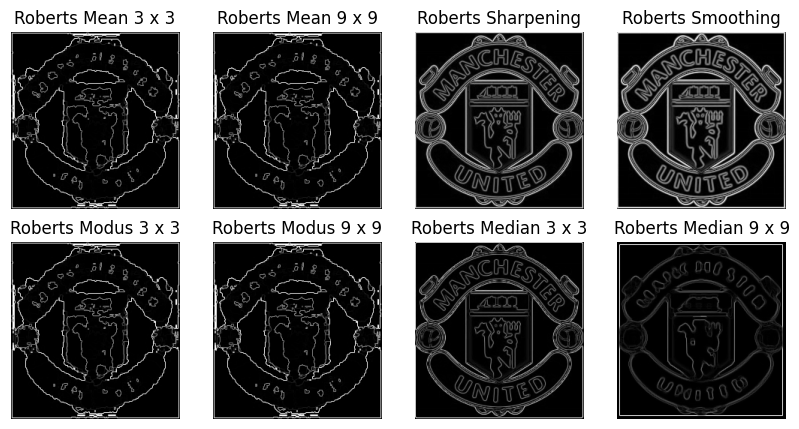

In [193]:
robert_mean3 = findEdge(mean3,robertX,robertY)
robert_median3 = findEdge(median3,robertX,robertY)
robert_modus3 = findEdge(modus3,robertX,robertY)
robert_mean9 = findEdge(mean9,robertX,robertY)
robert_median9 = findEdge(median9,robertX,robertY)
robert_modus9 = findEdge(modus9,robertX,robertY)
robert_smooth = findEdge(smooth_MU,robertX,robertY)
robert_sharp = findEdge(sharp_MU,robertX,robertY)

plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
plt.axis('off')
plt.imshow(robert_mean3, cmap='gray')
plt.title("Roberts Mean 3 x 3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(robert_mean9, cmap='gray')
plt.title("Roberts Mean 9 x 9")
plt.axis('off')
plt.subplot(2,4,3)
plt.imshow(robert_sharp, cmap='gray')
plt.title("Roberts Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(robert_smooth, cmap='gray')
plt.title("Roberts Smoothing")
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(robert_modus3, cmap='gray')
plt.title("Roberts Modus 3 x 3")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(robert_modus9, cmap='gray')
plt.title("Roberts Modus 9 x 9")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(robert_median3, cmap='gray')
plt.title("Roberts Median 3 x 3")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(robert_median9, cmap='gray')
plt.title("Roberts Median 9 x 9")
plt.axis('off')
plt.show